# Differing GRAE Results

In [1]:
from Helpers.grae_pipeline_helpers import read_all_graeBuild_results
import pandas as pd

2025-02-28 20:39:56.989824: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-28 20:39:57.229229: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-28 20:39:57.289646: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-28 20:39:57.678320: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-28 20:40:00.987389: W tensorflow/comp

In [2]:
grae_results = read_all_graeBuild_results()

In [3]:
grae_results["Anchor_Percent"].unique()

array([0.3, 0.1, 1. , 0.5])

In [4]:
grae_results

,method,dataset,split,lam,grae_build,MSE,full_rf_oob,full_knn_scoreA,full_rf_scoreA,full_knn_metricA,...,pred_rf_oob,pred_knn_scoreA,pred_rf_scoreA,pred_knn_metricA,pred_rf_metricA,pred_knn_scoreB,pred_rf_scoreB,pred_knn_metricB,pred_rf_metricB,Anchor_Percent
0,NAMA,heart_failure,random,100,original,0.107139,0.707113,0.683333,0.666667,0.644619,...,0.658996,0.733333,0.633333,0.685926,0.612623,0.633333,0.566667,0.507292,0.469772,0.3
1,JLMA,ConcreteCompressiveStrength,skewed,100,anchor_loss100,0.029097,0.233390,0.046765,0.131563,0.962653,...,0.250173,0.030251,0.089476,0.970956,0.940839,0.157205,0.249274,0.905171,0.854300,0.1
2,NAMA,flare1,distort,100,anchor_loss050,0.026515,0.864341,0.907692,0.892308,0.863772,...,0.864341,0.907692,0.907692,0.863772,0.885030,0.907692,0.923077,0.863772,0.896435,1.0
3,MAGAN,heart_failure,skewed,100,anchor_loss100,0.050961,0.686192,0.600000,0.633333,0.462500,...,0.650628,0.600000,0.666667,0.488707,0.647839,0.633333,0.650000,0.507292,0.562605,0.1
4,JLMA,ionosphere,turn,100,anchor_loss100,0.003261,0.891071,0.830986,0.887324,0.824124,...,0.898214,0.760563,0.830986,0.741258,0.826149,0.788732,0.788732,0.775473,0.787179,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42884,MASH-,ComputerHardware,skewed,100,anchor_loss050,0.011231,0.596209,0.837969,0.826396,0.242826,...,0.656369,0.674087,0.368287,0.344388,0.479465,0.610736,0.636390,0.376374,0.363760,0.1
42885,MAGAN,EnergyEfficiency,random,100,anchor_loss100,0.118011,0.767787,0.817231,0.953276,0.435954,...,0.771400,0.835584,0.802566,0.413487,0.453107,0.478712,0.137292,0.736255,0.947156,0.1
42886,SSMA,segmentation,distort,100,anchor_loss100,0.042679,0.238095,0.325581,0.372093,0.307707,...,0.217262,0.279070,0.162791,0.237862,0.159913,0.209302,0.209302,0.181229,0.177295,0.1
42887,DTA,seeds,skewed,100,anchor_loss100,0.231156,0.540881,0.925000,0.750000,0.922987,...,0.556604,0.350000,0.375000,0.353365,0.377091,0.825000,0.850000,0.822969,0.845403,0.1


In [5]:
grae_results[grae_results.columns[4:]].groupby("grae_build").mean().reset_index()#.plot(x="grae_build", y="MSE", kind="bar", title="MSE for GRAE")

,grae_build,MSE,full_rf_oob,full_knn_scoreA,full_rf_scoreA,full_knn_metricA,full_rf_metricA,full_knn_scoreB,full_rf_scoreB,full_knn_metricB,...,pred_rf_oob,pred_knn_scoreA,pred_rf_scoreA,pred_knn_metricA,pred_rf_metricA,pred_knn_scoreB,pred_rf_scoreB,pred_knn_metricB,pred_rf_metricB,Anchor_Percent
0,anchor_loss050,0.077991,0.580075,0.610442,0.603789,0.675105,0.680589,0.531956,0.513601,0.661258,...,0.583383,0.507062,0.473666,0.660405,0.675483,0.589031,0.560561,0.665542,0.672260,0.514628
1,anchor_loss100,0.077747,0.580499,0.610772,0.604028,0.674014,0.679413,0.532163,0.513848,0.660486,...,0.584042,0.507337,0.475341,0.659063,0.672977,0.590227,0.560968,0.663800,0.671067,0.515369
2,anchor_loss150,0.078103,0.580776,0.610787,0.604524,0.674062,0.679341,0.532444,0.515284,0.660088,...,0.584384,0.507487,0.474420,0.658879,0.673047,0.589421,0.561569,0.663250,0.670540,0.514560
3,original,0.078279,0.579825,0.609190,0.602781,0.673805,0.679383,0.531240,0.513754,0.660152,...,0.583069,0.507066,0.474653,0.658861,0.674091,0.589525,0.560502,0.664820,0.672537,0.514882


In [6]:
grae_results[grae_results.columns[4:]].groupby("grae_build").mean().reset_index()[grae_results.columns[15:]].rank(numeric_only=True, method="max")

,pred_rf_oob,pred_knn_scoreA,pred_rf_scoreA,pred_knn_metricA,pred_rf_metricA,pred_knn_scoreB,pred_rf_scoreB,pred_knn_metricB,pred_rf_metricB,Anchor_Percent
0,2.0,1.0,1.0,4.0,4.0,1.0,2.0,4.0,3.0,2.0
1,3.0,3.0,4.0,3.0,1.0,4.0,3.0,2.0,2.0,4.0
2,4.0,4.0,2.0,2.0,2.0,2.0,4.0,1.0,1.0,1.0
3,1.0,2.0,3.0,1.0,3.0,3.0,1.0,3.0,4.0,3.0


In [7]:
grae_results[grae_results.columns[4:]].groupby("grae_build").mean().reset_index()[grae_results.columns[15:]].rank(numeric_only=True, method="max").sum(axis=1)

0    24.0
1    29.0
2    23.0
3    24.0
dtype: float64

In [8]:
grae_results[grae_results.columns[4:]].groupby("grae_build").mean().reset_index()[grae_results.columns[15:]].sum(axis=1)

0    5.902020
1    5.900192
2    5.897557
3    5.900007
dtype: float64

In [9]:
grae_results.columns

Index(['method', 'dataset', 'split', 'lam', 'grae_build', 'MSE', 'full_rf_oob',
       'full_knn_scoreA', 'full_rf_scoreA', 'full_knn_metricA',
       'full_rf_metricA', 'full_knn_scoreB', 'full_rf_scoreB',
       'full_knn_metricB', 'full_rf_metricB', 'pred_rf_oob', 'pred_knn_scoreA',
       'pred_rf_scoreA', 'pred_knn_metricA', 'pred_rf_metricA',
       'pred_knn_scoreB', 'pred_rf_scoreB', 'pred_knn_metricB',
       'pred_rf_metricB', 'Anchor_Percent'],
      dtype='object')

<Axes: title={'center': 'Results'}, xlabel='grae_build'>

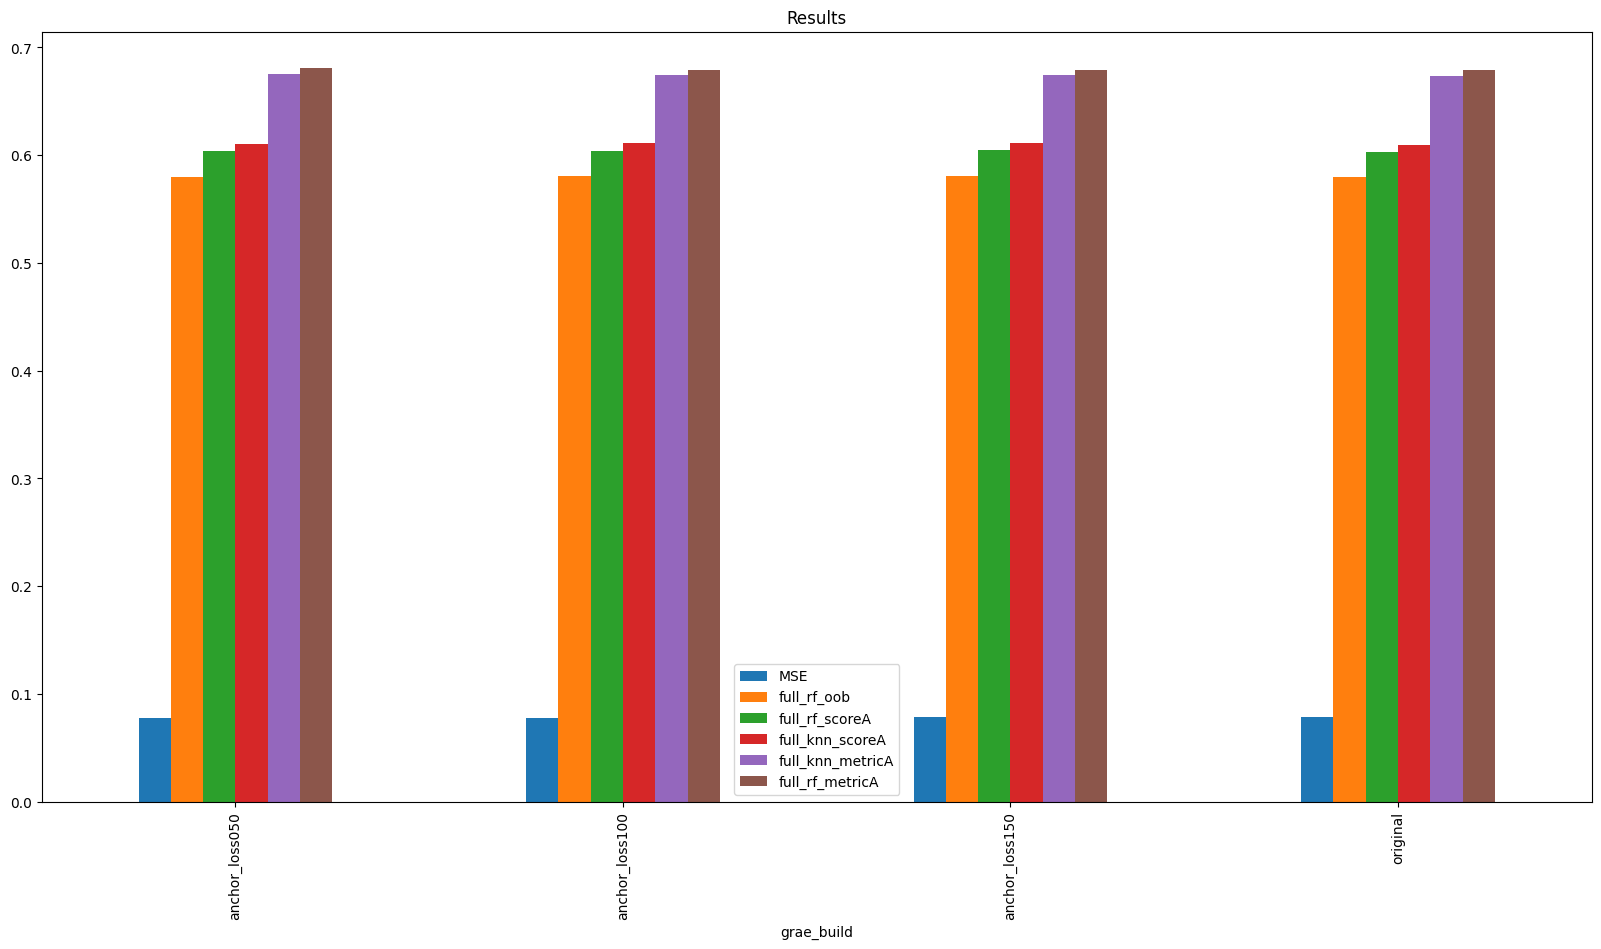

In [10]:
Col = grae_results.columns[4:][[0,1, 2,3,4,5,6]]
df = grae_results[Col].groupby("grae_build").mean().reset_index()
ordered_cols = ["grae_build"] + sorted(list(Col[1:]), key=lambda c: df[c].min())
df.plot(x="grae_build", y=ordered_cols[1:], kind="bar", title="Results", figsize=(20,10))

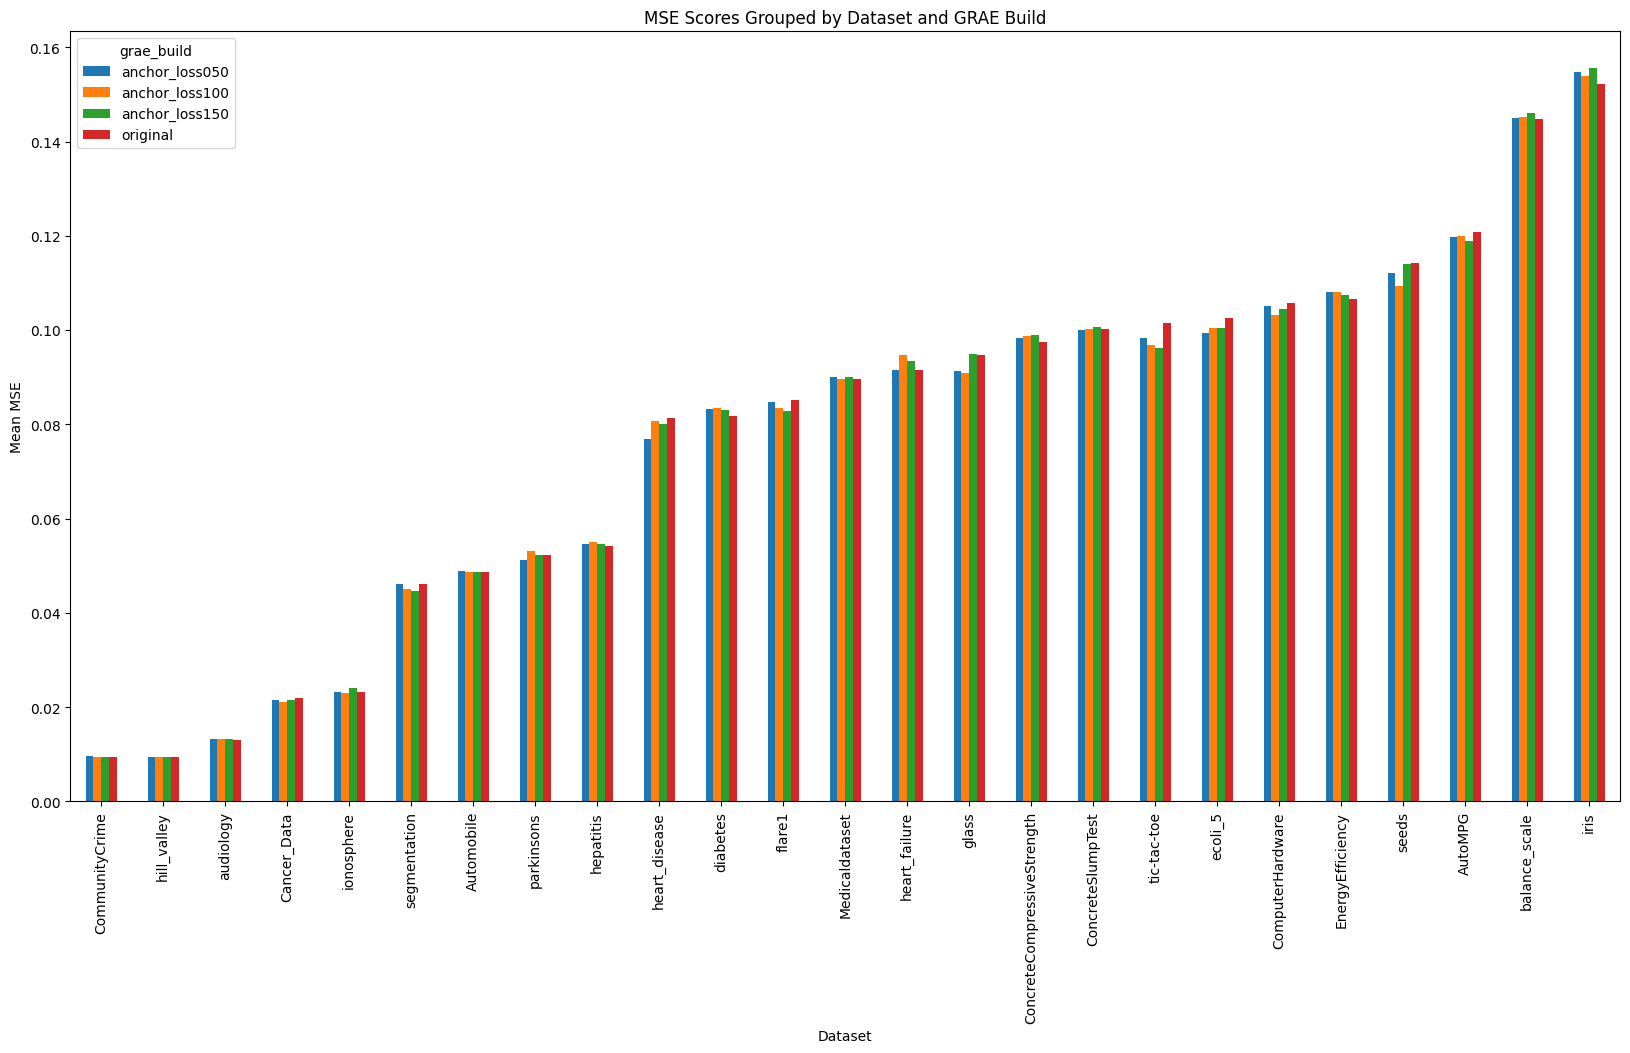

In [11]:
import matplotlib.pyplot as plt

# Group by dataset and grae_build, then calculate the mean MSE
grouped_df = grae_results.groupby(['dataset', 'grae_build'])['MSE'].mean().unstack()

# Sort the DataFrame by the mean MSE of the 'original' grae_build
grouped_df = grouped_df.sort_values(by='original')

# Plot the results
grouped_df.plot(kind='bar', figsize=(20, 10), title='MSE Scores Grouped by Dataset and GRAE Build')
plt.ylabel('Mean MSE')
plt.xlabel('Dataset')
plt.show()

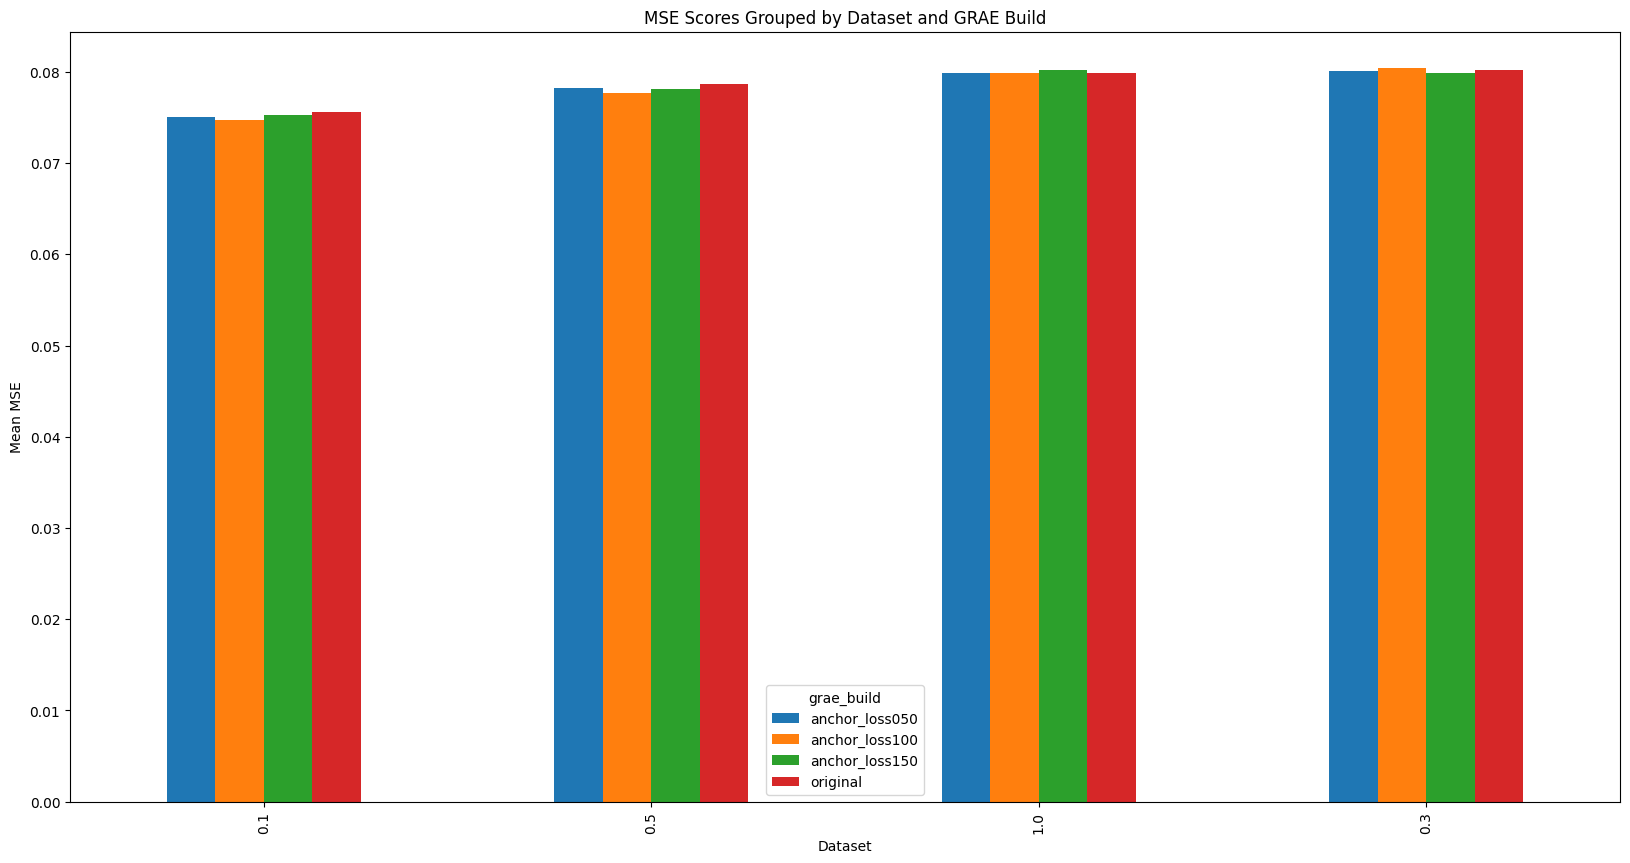

In [12]:
import matplotlib.pyplot as plt

# Group by dataset and grae_build, then calculate the mean MSE
grouped_df = grae_results.groupby(['Anchor_Percent', 'grae_build'])['MSE'].mean().unstack()

# Sort the DataFrame by the mean MSE of the 'original' grae_build
grouped_df = grouped_df.sort_values(by='original')

# Plot the results
grouped_df.plot(kind='bar', figsize=(20, 10), title='MSE Scores Grouped by Dataset and GRAE Build')
plt.ylabel('Mean MSE')
plt.xlabel('Dataset')
plt.show()

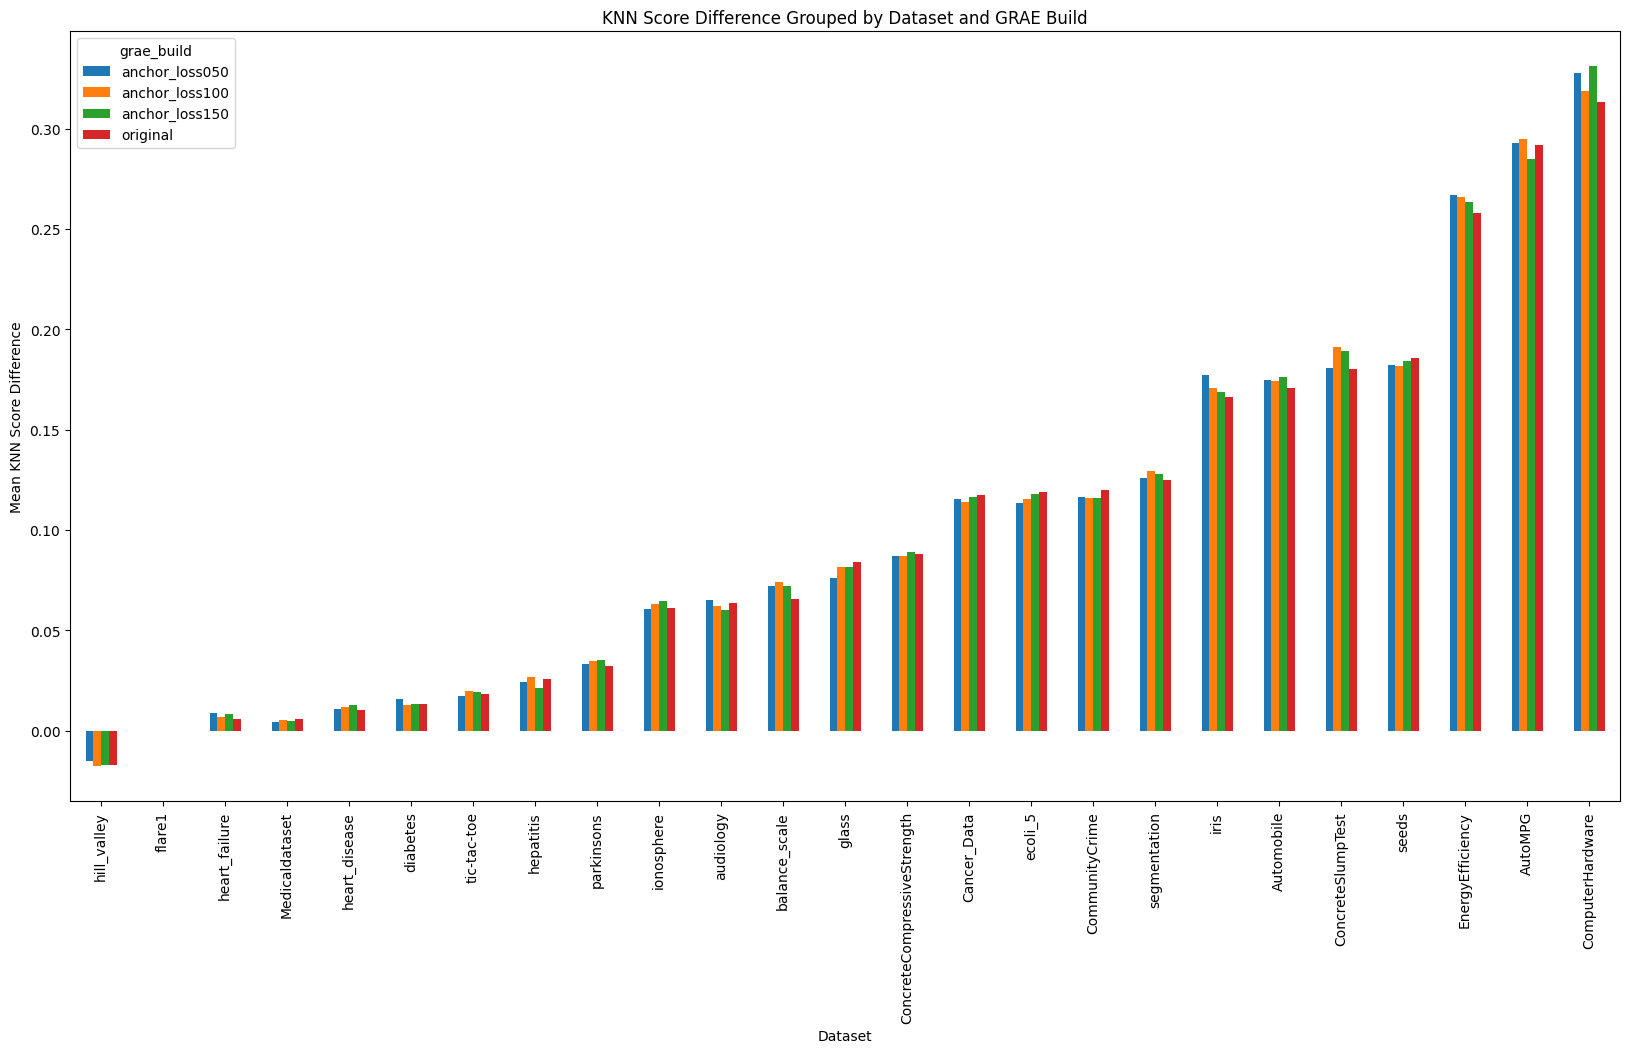

In [13]:
import matplotlib.pyplot as plt

# Calculate the difference between full_knn_scoreA and pred_knn_scoreA
grae_results['knn_score_diff'] = grae_results['full_knn_scoreA'] - grae_results['pred_knn_scoreA']

# Group by dataset and grae_build, then calculate the mean of the difference
grouped_df = grae_results.groupby(['dataset', 'grae_build'])['knn_score_diff'].mean().unstack()

# Sort the DataFrame by the mean difference of the 'original' grae_build
grouped_df = grouped_df.sort_values(by='original')

# Plot the results
grouped_df.plot(kind='bar', figsize=(20, 10), title='KNN Score Difference Grouped by Dataset and GRAE Build')
plt.ylabel('Mean KNN Score Difference')
plt.xlabel('Dataset')
plt.show()

# Testing the Pipeline

In [14]:
from Helpers.grae_pipeline_helpers import *

tasks = create_tasks_for_parrelization(extract_all_files())
tasks[0:3]

[('SPUD',
  'ComputerHardware',
  'random',
  {'knn': 12, 'OD_method': 'default', 'agg_method': 'log'},
  0.1,
  'anchor_loss050',
  42),
 ('SPUD',
  'ComputerHardware',
  'random',
  {'knn': 12, 'OD_method': 'default', 'agg_method': 'log'},
  0.5,
  'anchor_loss050',
  42),
 ('SPUD',
  'ComputerHardware',
  'random',
  {'knn': 12, 'OD_method': 'default', 'agg_method': 'log'},
  1,
  'anchor_loss050',
  42)]

In [15]:
task_iris = next(task for task in tasks if task[4] == 0.1)
task_iris

('SPUD',
 'ComputerHardware',
 'random',
 {'knn': 12, 'OD_method': 'default', 'agg_method': 'log'},
 0.1,
 'anchor_loss050',
 42)

In [16]:
GRAE_tests(*tasks[15])

Results already exist for SPUD, ComputerHardware, random.


False

In [17]:
#Get the embeddings
emb_pred, emb_full, labels = get_embeddings(*task_iris)

# Calculate MSE between embeddings
train_len = len(labels[0])
test_len = train_len + len(labels[1])
mse_emb_pred = np.vstack([emb_pred[train_len:test_len], emb_pred[test_len + train_len:]])
mse_emb_full = np.vstack([emb_full[train_len:test_len], emb_full[test_len + train_len:]])
mse = mean_squared_error(mse_emb_pred, mse_emb_full)